# Estudio de Rentabilidad de Videojuegos

-----

## Overview

### Descripción

<div style="color: #196CC4;">
La tienda online Ice es un minorista global que se especializa en la venta de videojuegos. Este proyecto utiliza datos disponibles de fuentes abiertas, como reseñas de usuarios y expertos, géneros de juegos, plataformas (como Xbox y PlayStation), y datos históricos de ventas.
</div>

### Objetivo

<div style="color: #196CC4;">
identificar patrones que permitan predecir si un videojuego tendrá éxito. A partir de la detección de proyectos prometedores, los conocimientos obtenidos se utilizarán para planificar estratégicamente una campaña publicitaria dirigida hacia el año 2017.
</div>

### Recursos

<div style="color: #196CC4;">
Datos disponibles hasta el año 2016. En diciembre de 2016 se inicia la planeación de una campaña para 2017.<br>

▶ Name (Nombre)<br>
▶ Platform (Plataforma)<br>
▶ Year_of_Release (Año de lanzamiento)<br>
▶ Genre (Género) <br>
▶ NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) <br>
▶ EU_sales (ventas en Europa en millones de dólares estadounidenses) <br>
▶ JP_sales (ventas en Japón en millones de dólares estadounidenses) <br>
▶ Other_sales (ventas en otros países en millones de dólares estadounidenses) <br>
▶ Critic_Score (máximo de 100) <br>
▶ User_Score (máximo de 10) <br>
▶ Rating (ESRB)*<br><br>

*El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.
</div>

### Metodología

<div style="color: #196CC4;">
<ol>
<li>Inicialización y Exploración de Datos
<ul>
<li>Se importan las librerías, módulos y el conjunto de datos "games.csv".</li>
<li>Se explora el conjunto de datos, identificando correlaciones iniciales, valores faltantes, duplicados y anomalías en la sintaxis.</li>
<li>Se limpia el dataset normalizando los nombres de las columnas, tratando los valores faltantes y asegurando que los tipos de datos sean los adecuados.</li>
</ul>
</li>
<li>Análisis de Ventas de Videojuegos
<ul>
<li>Se calcula la estadística descriptiva del conjunto de datos.</li>
<li>Se determina el rango de años cubiertos por los datos.</li>
<li>Se analizan las ventas totales por región geográfica.</li>
<li>Se estudia la evolución del número de lanzamientos de juegos a lo largo del tiempo.</li>
<li>Se identifica el ranking de las plataformas por ventas.</li>
<li>Se analizan las tendencias y popularidad de las diferentes plataformas.</li>
<li>Se calculan la varianza y desviación estándar de las ventas por plataforma.</li>
<li>Se visualiza la distribución global de las ventas por plataforma.</li>
<li>Se evalúa la influencia de las reseñas en las ventas de PS4.</li>
<li>Se analiza la distribución y rentabilidad de los juegos por género.</li>
<li>Se identifican los géneros con mayor cuota de mercado en cada región.</li>
<li>Se realiza un ranking de las cuotas de mercado por clasificación y región.</li>
</ul>
</li>
<li>Pruebas de Hipótesis
<ul>
<li>Se realizan pruebas T para comparar las clasificaciones entre plataformas.</li>
<li>Se realizan pruebas T para comparar las clasificaciones entre géneros.</li>
</ul>
</li>
<li>Conclusiones</li>
</ol>
</div>

-----

## Información general 

### Inicializacion

<div style="color: #196CC4;">
▶ Carga de módulos, librerías y un dataset de videojuegos.
</div>

In [1]:
# Loading modules and libraries.

# statistical functions and distributions.
from scipy import stats as st  

# multidimensional arrays, mathematical functions, and linear algebra operations.
import numpy as np 

# data structures and tools for data analysis.
import pandas as pd

# plots and visualizations.
from matplotlib import pyplot as plt

# data visualization library based on Matplotlib.
import seaborn as sns 

# statistical functions and distributions.
from scipy import stats

In [2]:
#Loading dataset
games = pd.read_csv('datasets/games.csv')

### Despliegue de datos

<div style="color: #196CC4;">
▶ Propiedades generales del dataset y visualización previa de la tabla.
</div>

In [3]:
# General information about this DataFrame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Display DataFrame information
display(games) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style="color: #196CC4;">
<b>A continuación describo las observaciones iniciales:</b><br>
▶ Los nombres de las variables tienen letras mayúsculas y por consistencia es mejor tenerlos todos en minúsculas<br>
▶ Hay valores ausentes en varias columnas: Name, Year_of_Release, Genre, User_Score, Critic_Score, Rating<br>
▶ Hay columnas que tienen un tipo de datos equivocado: Year_of_Release, User_Score
</div>

-----

## Análisis Exploratorio de Datos (EDA)

### Consistencia en series

<div style="color: #196CC4;">
▶ A continuación se convierten los nombres de las columnas a minúsculas ya que es mejor homologar para facilitar el manejo de los datos.
</div>

In [5]:
#Series names in lowercase
games.columns = games.columns.str.lower()

# Display DataFrame information
display(games.head(5)) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Limpieza de datos

In [6]:
# Setting year_of_release data type to int, filling NaN gaps with 0
#games["year_of_release"] = games["year_of_release"].fillna(0).astype(int)


<div style="color: #196CC4;">
    <b>Columna 'user_score' y valor 'tbd':</b><br>
▶ La columna debe ser de tipo flotante (float) y no de texto (object) ya que los valores que contiene esta serie son decimales, sin embargo hay muchos videojuegos que tienen el valor 'tbd' (to be defined) que es una cadena de texto. <br>
▶ Convertir este tipo de dato a flotante es necesario para poder realizar cálculos matemáticos más adelante que puedan enriquecer el análisis. Finalmente las valoraciones deben influir en los patrones que determinen si un juego tiene éxito o no.<br>
▶ A continuación se reemplazan los valores de 'tbd' por NaN para poder convertir la columna a tipo de dato flotante (float).<br>

</div>

In [7]:
# Replace tbd values with NaN and change of data type in user_score series
games["user_score"] = games["user_score"].replace("tbd",np.nan).astype(float)

<div style="color: #196CC4;">
    <b>Columna 'rating':</b><br>
▶ Esta columna es de tipo texto (object). Se reemplazan los valores ausentes (NaN) por 'Not defined', solo para tener un lenguaje más amigable al identificar aquellos juegos que no fueron categorizados.
</div>

In [8]:
# Fill of NaN values in rating
games['rating'] = games['rating'].fillna('Not defined')

<div style="color: #196CC4;">
    <b>Columnas 'name' y 'genre':</b><br>
▶ En las propiedades iniciales del Dataframe se identifican solo dos valores ausentes (NaN) en estas dos series.<br>
▶ También se observa que estos valores ausentes coinciden en los mismos juegos y no tienen información de valor en valoraciones ni rating.<br>
▶ Al ser solo dos juegos de una muestra representativa de datos, quitarlos del Dataframe no afectará el análisis posterior y tampoco agregan valor al tener varios valores ausentes en estas filas.
</div>

In [9]:
# Display of 2 missing games definition
print()
missing_games = games.loc[games['name'].isna()]
print('Hay 2 juegos sin definición de nombre, género ni rating:')
display(missing_games)

# Delete games with 'NaN' on name and genre
games.dropna(subset=['name'], inplace=True)


Hay 2 juegos sin definición de nombre, género ni rating:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Not defined
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Not defined


### Despliegue de información

<div style="color: #196CC4;">
▶ A continuación se verifican los cambios realizados en las propiedades del DataFrame y su previsualización.<br>
▶ Aún se observan valores ausentes en 'user_score', pero ya que son demasiados será importante mantenerlos así para no afectar el análisis posterior.
</div>

In [10]:
# General DataFrame properties
print()
print('Propiedades del DataFrame limpio:')
print()
games.info()


Propiedades del DataFrame limpio:

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [11]:
# DataFrame information
print()
print('Previsualización del DataFrame:')
display(games)


Previsualización del DataFrame:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not defined
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not defined
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not defined
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not defined
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not defined
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not defined


<div style="color: #196CC4;">
▶ A continuación se muestra el rango de años que se estarán analizando a lo largo de este proyecto: desde 1980 y hasta 2016.
</div>

In [12]:
# Getting range of years within the dataset
min_year = games[games['year_of_release'] != 0]['year_of_release'].min()
max_year = games['year_of_release'].max()

print('El dataset contiene datos de videojuegos desde el año', min_year,'y hasta', max_year, '.')

El dataset contiene datos de videojuegos desde el año 1980.0 y hasta 2016.0 .


### Feature Engineering

<div style="color: #196CC4;">
▶ Hay varias columnas que tienen ventas por zona geográfica (Norteamérica, Europa, Japón y otras). Las ventas también son un dato que influye en el éxito de un juego.<br>
▶ Se suman las ventas de todas las zonas y concentrado este dato en una nueva columna 'total_sales'; esto seguramente ayudará más adelante en el análisis de información.
</div>

In [13]:
# Creación de nueva columna con ventas totales
print()
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print('Nueva columna con suma de ventas totales para cada juego:')
display(games)


Nueva columna con suma de ventas totales para cada juego:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not defined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not defined,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not defined,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not defined,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not defined,0.01


-----

## Análisis de datos

### Juegos lanzados por año

<div style="color: #196CC4;">
▶ A continuación se muestra información relacionada con el lanzamiento de videojuegos por año</div>

In [14]:
# Counting of game releases per year
total_games_year = games[games['year_of_release'] != 0]
total_games_year = total_games_year['year_of_release'].value_counts().sort_index()

# Display data
print("Juegos lanzados por año:")
display(total_games_year.head())


Juegos lanzados por año:


year_of_release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: count, dtype: int64

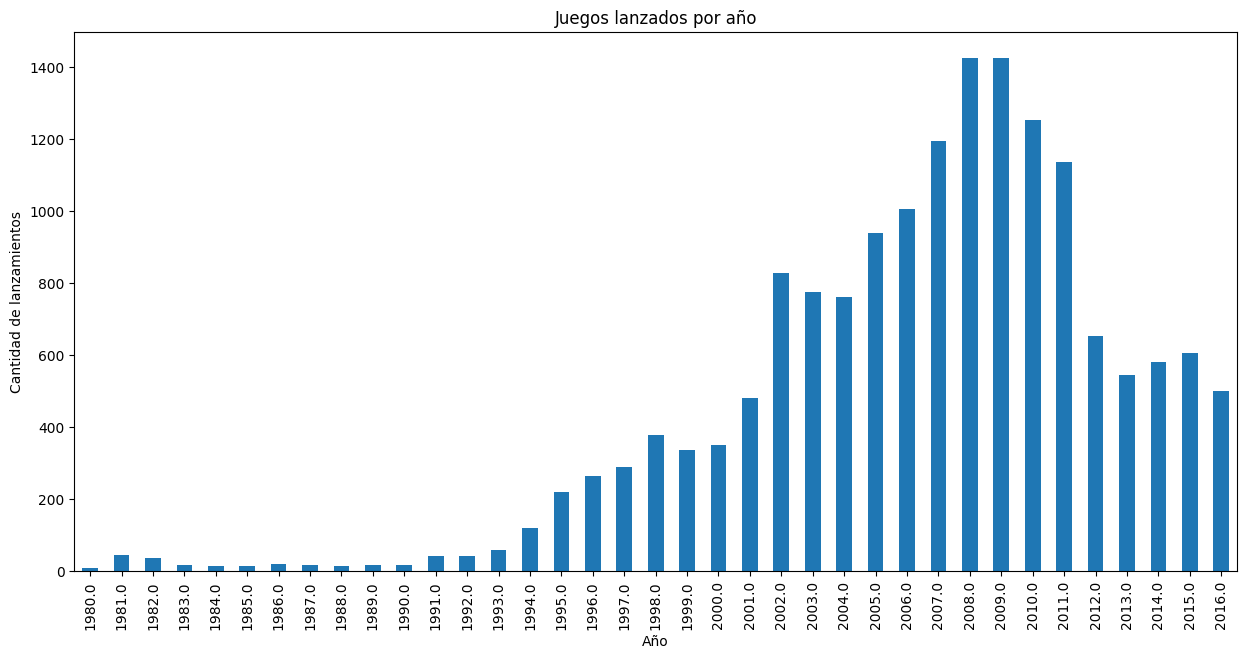

In [15]:
# Bar graph creation
total_games_year.plot(
        x='year_of_release',
        kind='bar',
        title='Juegos lanzados por año',
        xlabel='Año',
        ylabel='Cantidad de lanzamientos',
        figsize=[15, 7])

plt.show() 

<div style="color: #196CC4;">
<b>ANÁLISIS DE RESULTADOS: </b><br>
▶ Nacimiento y crecimiento gradual de 1980 al año 2000: Durante este período, el número de lanzamientos de juegos aumentó gradualmente, pasando de 9 en 1980 a 350 en el 2000. <br>
▶ Crecimiento exponencial y consolidación del 2001 al 2011: En este período hubo un incremento exponencial en el número de lanzamientos, alcanzando su punto máximo en 2008 y 2009 con 1427 y 1426 respectivamente. Este factor claramente refleja la gran popularidad que los videojuegos adquirieron y la consolidación de la industria en el mercado.<br>
▶ Declive y asentamiento a partir del año 2012: A partir de 2012, hubo una disminución muy marcada en la cantidad de lanzamientos<br></div>

### Ventas por plataformas

<div style="color: #196CC4;">
▶ A continuación se muestran detalles del ranking de venta de videojuegos por plataforma.</div>

In [16]:
# Total platforms
total_platforms = games['platform'].nunique()
print("Cantidad total de plataformas:")
print(total_platforms)
print()

# Platforms ranking with top sales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

Cantidad total de plataformas:
31



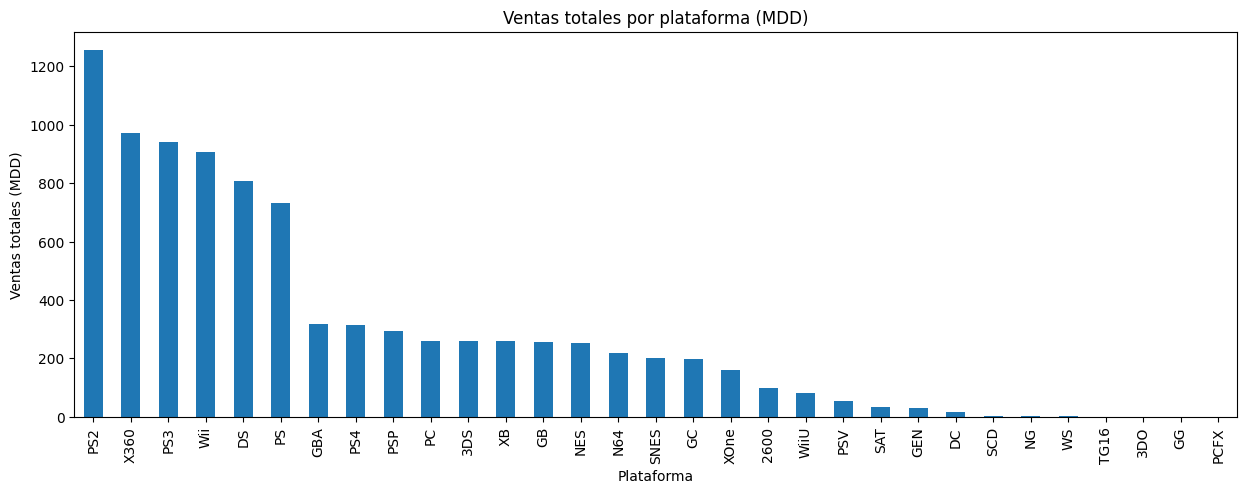

In [17]:
# Bar graph creation
platform_sales.plot(
        x='platform',
        kind='bar',
        stacked=True,
        title='Ventas totales por plataforma (MDD)',
        xlabel='Plataforma',
        ylabel='Ventas totales (MDD)',
        figsize=[15, 5])

plt.show() 

<div style="color: #196CC4;">
<b>ANÁLI
    SIS DE RESULTADOS: </b><br>
▶ Las 6 plataformas con mayor número de ventas a lo largo de las décadas han sido PS2 seguida de X360, PS3, Wii, DS y PS respectivamente. Las ventas para el resto de las plataformas es considerablemente menor con respecto al top 6.</div>

### Tendencias de plataformas

<div style="color: #196CC4;">
▶ A continuación se muestran tendencias y popularidad de las diferentes plataformas a lo largo de los años.</div>

In [18]:
# Filter of top 8 platform sales
top_platforms = platform_sales.head(8)

print("Top de plataformas con mayores ventas totales:")
print(top_platforms)

Top de plataformas con mayores ventas totales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
Name: total_sales, dtype: float64


In [19]:
# Excluding games without year of release
zero_year_filtered = games[games['year_of_release'] != 0]

# Calcular las ventas totales por año y plataforma
platform_sales_by_year = zero_year_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().loc[top_platforms.index, :].sort_index(level='year_of_release')

print()
print("Ventas totales por año para plataformas 'top sales':")
display(platform_sales_by_year.head(5))                             


Ventas totales por año para plataformas 'top sales':


platform  year_of_release
DS        1985.0               0.02
PS        1994.0               6.03
          1995.0              35.96
          1996.0              94.70
          1997.0             136.17
Name: total_sales, dtype: float64

In [20]:
# Separate data by year
platform_sales_pivot = platform_sales_by_year.unstack(level=0)
display(platform_sales_pivot.head(5))

platform,DS,PS,GBA,PS2,X360,PS3,Wii,PS4
year_of_release,,,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN


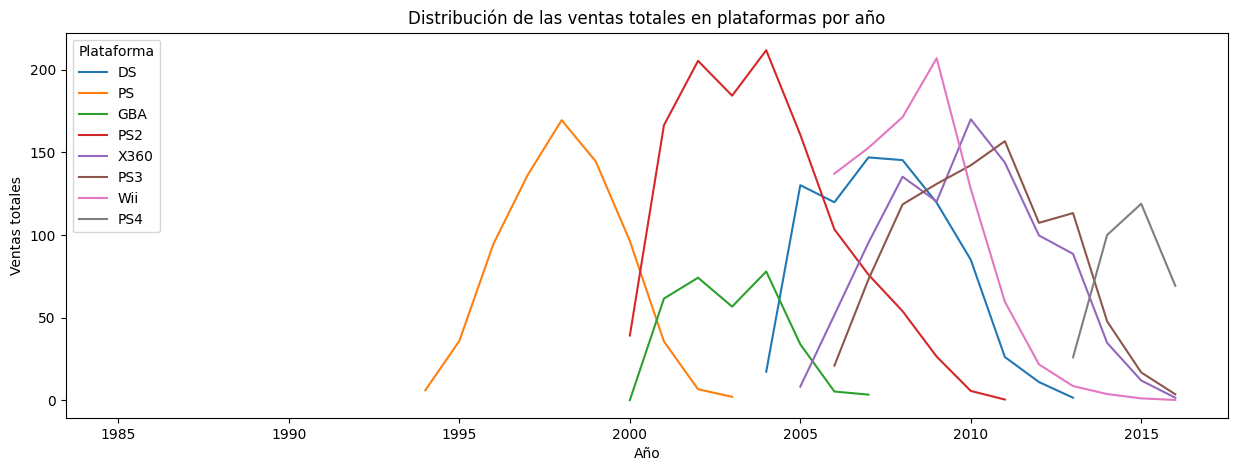

In [21]:
# Lines graph creation
platform_sales_pivot.plot(
    kind='line',
    title='Distribución de las ventas totales en plataformas por año',
    xlabel='Año',
    ylabel='Ventas totales',
    figsize=[15, 5]
)
plt.legend(title='Plataforma')
plt.show()


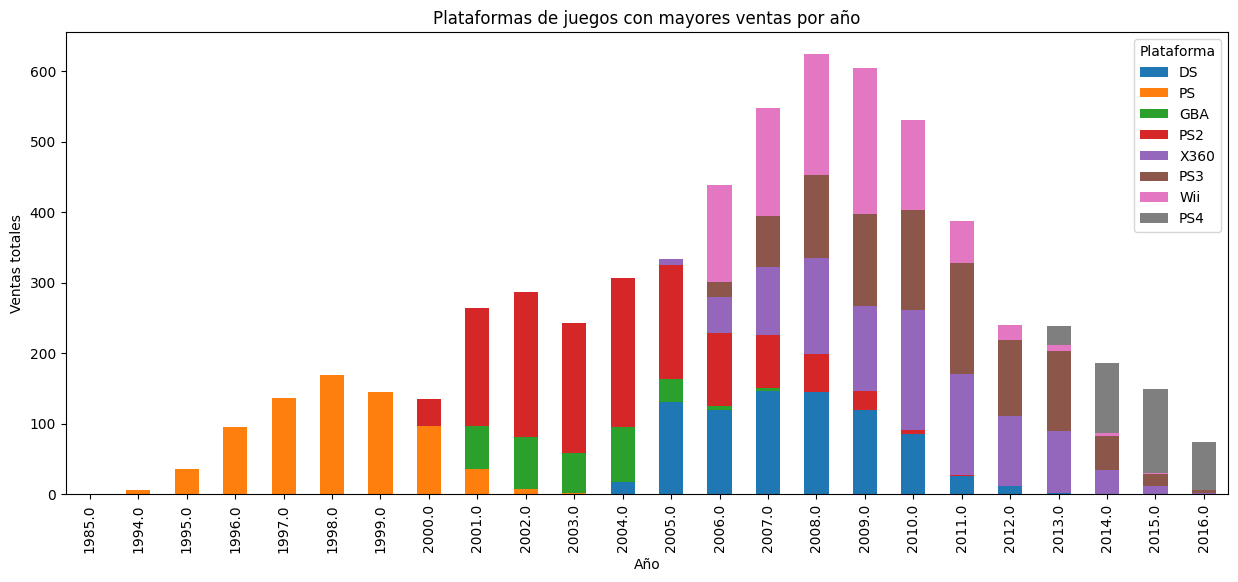

In [22]:
# Bar graph creation
platform_sales_pivot.plot(
        kind='bar',
        stacked=True,
        title='Plataformas de juegos con mayores ventas por año',
        xlabel='Año',
        ylabel='Ventas totales',
        figsize=[15, 6])

plt.legend(title='Plataforma')
plt.show() 


<div style="color: #196CC4;">
<b>ANÁLISIS DE RESULTADOS: </b><br>
▶ A continuación se describe un análisis específico de la popularidad en el mercado de estas 6 plataformas con mayor número de ventas en el mercado desde 1994 a 2016:
<ul>
<li><b>PlayStation:</b> La PS original tuvo una popularidad considerable desde su lanzamiento en 1994 hasta aproximadamente 2000, cuando fue reemplazada por la PS2. </li>
<li><b>PlayStation 2:</b> Fue muy popular desde su lanzamiento en 2000 hasta aproximadamente 2006, año en que surgieron varias consolas.</li>
<li><b>Nintendo DS:</b> Popular desde su lanzamiento en 2004 hasta alrededor de 2010, cuando comenzó a perder ventas.</li>
<li><b>Xbox 360:</b> Popular desde su lanzamiento en 2005 hasta alrededor de 2013.</li>
<li><b>PlayStation 3:</b> Similar a la Xbox 360, tuvo una buena popularidad desde su lanzamiento en 2006 hasta aproximadamente 2013.</li>
<li><b>Wii:</b> Reconocida desde su lanzamiento en 2006 hasta alrededor de 2010, cuando comenzó a disminuir su popularidad.</li>
</ul>
▶ Estas plataformas tienen en común que a partir de su lanzamiento, su popularidad creció muy rápido y se mantuvo o en su defecto, disminuyó muy poco a lo largo de los siguientes 5 años a su lanzamiento, momento en que otras consoloas/tecnologías surgían y entonces la disminución en ventas de estas plataformas ya maduras disminuía radicalmente.<br>
▶ Hacia el año 2017 (no se visualiza en los datos de este proyecto), se observa cómo PS4 está dominando el terreno desde su lanzamiento en 2013 y seguramente continuará bien posicionado posiblemente hasta aproximadamente el 2018, cumpliendo así con el ciclo de vida y popularidad que han tenido las otras plataformas en años anteriores.<br>
▶ Es muy interesante observar el ciclo de vida de las plataformas, desde su nacimiento, crecimiento exponencial y posicionamiento, hasta su declive, cuando se da el lanzamiento de una nueva innovación en la industria.<br></div>


### Varianza y Desviación estándar

In [23]:
# Variance and standard deviation for platforms
varianza_platform = np.var(platform_sales_pivot).sort_values(ascending=False)
desviacion_estandar_platform = np.std(platform_sales_pivot).sort_values(ascending=False)

# Display data
print("Varianza:", varianza_platform)
print()
print("Desviación estándar:", desviacion_estandar_platform)

Varianza: platform
PS2     5779.830706
Wii     5693.235223
PS      3612.095556
DS      3457.798218
X360    3029.085722
PS3     2713.875874
PS4     1234.316925
GBA      939.538700
dtype: float64

Desviación estándar: platform
PS2     76.025198
Wii     75.453530
PS      60.100712
DS      58.803046
X360    55.037130
PS3     52.094874
PS4     35.132847
GBA     30.651896
dtype: float64


c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<div style="color: #196CC4;">
<b>ANÁLISIS DE RESULTADOS: </b><br><br>
▶ Varianza
    <ul>
        <li>La varianza para cada plataforma indica cuánto varían las ventas de juegos para cada una. Por ejemplo una varianza  alta indica mayor dispersión respecto de la media, mientras que una varianza baja demuestra que los puntos de datos están más cerca de la media.</li>
        <li>PS2, Wii y PS indican más variabilidad en las ventas. </li>
        <li>GBA, PS4 y PS3 indican menos variabilidad en las ventas.</li>
    </ul>
▶ Desviación estándar
    <ul>
        <li>La desviación estándar (raíz cuadrada de la varianza) para cada plataforma indica la cantidad típica de variación en los datos de ventas. Por ejemplo, si la desviación estándar es de 20 unidades, entonces podríamos esperar que la mayoría de las ventas caigan dentro de 20 unidades de la media.</li>
        <li>Wii, PS2 y PS nos muestran que tienen datos de ventas más dispersos. </li>
        <li>GBA, PS4 y PS3 indican datos de ventas menos dispersos.</li>
    </ul>
   
</div>

### Filtrado de datos (2013 - 2016)

<div style="color: #196CC4;">
▶ A continuación se filtran los datos considerando solamente los últimos 4 años de información. Esta información se estará utilizando en análisis posteriores.</div>

In [24]:
# Last 4 years filter
#last_five_years = games['year_of_release'].nlargest(5)
new_games = games[games['year_of_release'] >= 2013] 
#display(new_games)

### Distribución de plataformas

<div style="color: #196CC4;">
▶ A continuación se muestra un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma (el segundo diagrama tiene un zoom in al cuerpo de las cajas).</div>

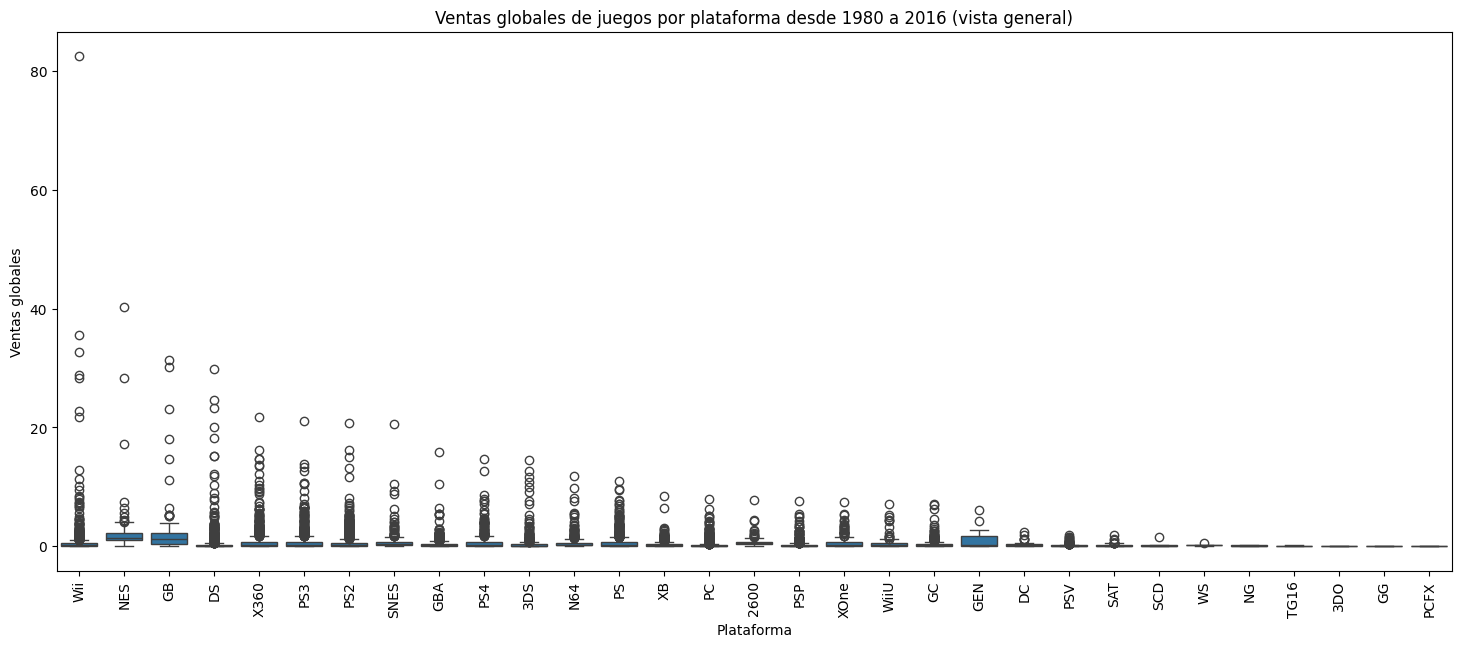

In [25]:
# Setting up the box plot
plt.figure(figsize=(18, 7))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Ventas globales de juegos por plataforma desde 1980 a 2016 (vista general)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=90)
plt.show()


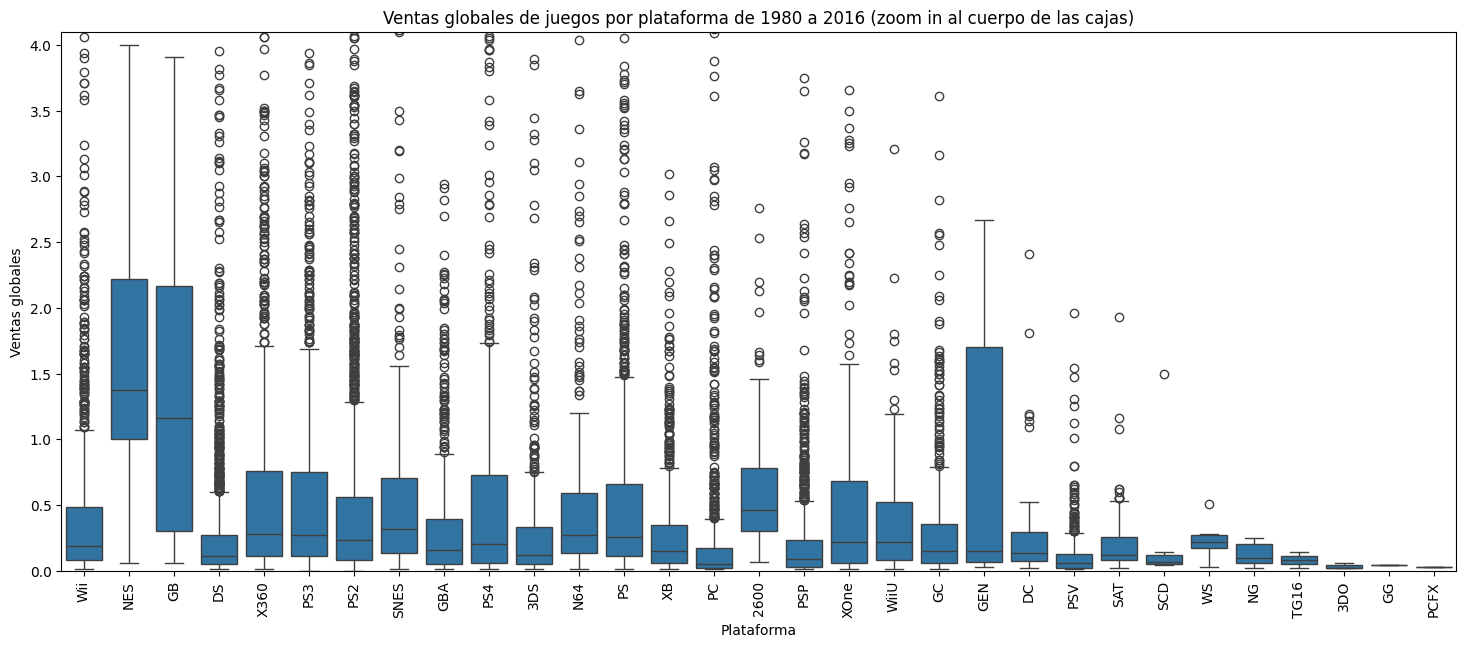

In [26]:
# Zoom in graph
# Setting up the box plot
plt.figure(figsize=(18, 7))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Ventas globales de juegos por plataforma de 1980 a 2016 (zoom in al cuerpo de las cajas)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=90)
plt.ylim(0, 4.1)  # Visualización solo de 0 a 4 
plt.show()

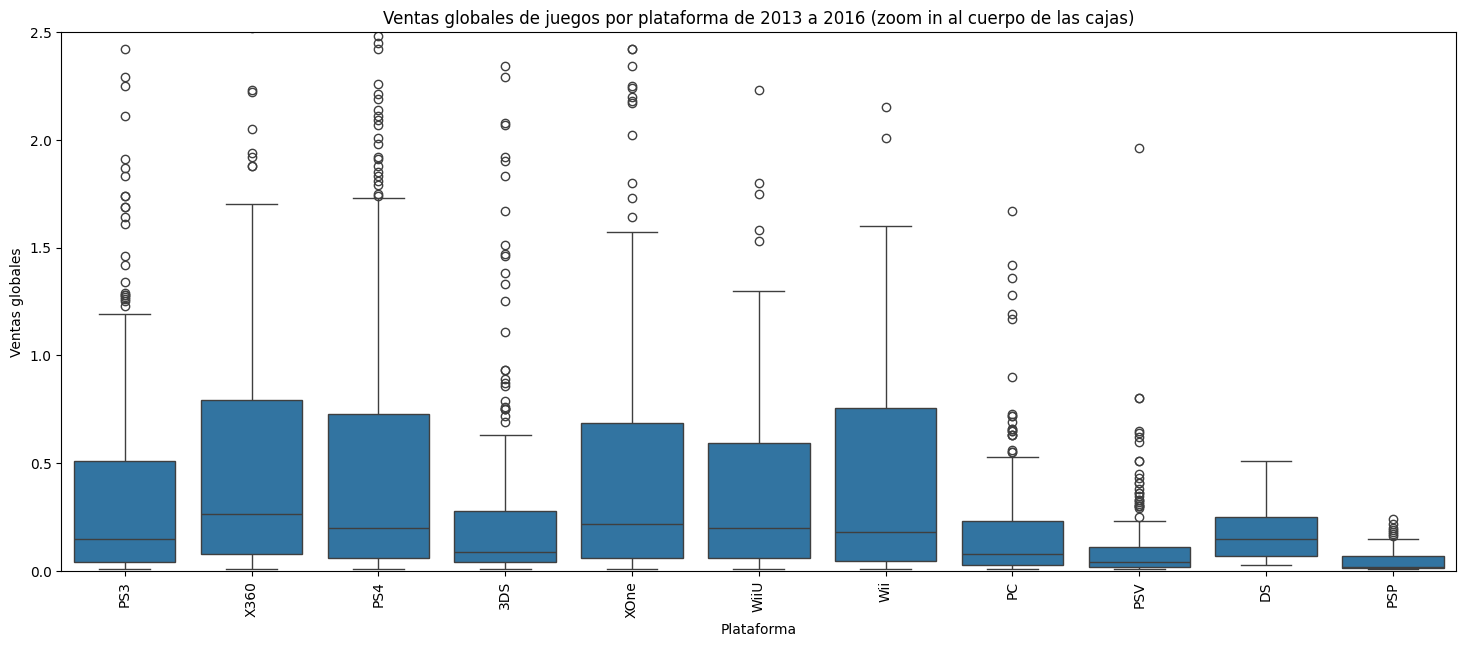

In [27]:
# Zoom in graph
# Setting up the box plot
plt.figure(figsize=(18, 7))
sns.boxplot(x='platform', y='total_sales', data=new_games)
plt.title('Ventas globales de juegos por plataforma de 2013 a 2016 (zoom in al cuerpo de las cajas)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=90)
plt.ylim(0, 2.5)  # Visualización solo de 0 a 4 
plt.show()

<div style="color: #196CC4;">
<b>ANÁLISIS DE RESULTADOS: </b><br><br>
▶ Se pueden observar algunas tendencias generales para las plataformas en las ventas de videojuegos a lo largo de las décadas en las primeras dos gráficas. A continuación muestro el análisis de las cajas de plataformas de los años 2013 al 2016 (último diagrama de cajas que se muestra):
<ul>
<li>La mayoría de las ventas de videojuegos para casi todas las plataformas están concentradas en un rango relativamente estrecho. </li>
<li>Cada plataforma tiene su propia zona predominante de ventas importantes o más en auge. Por ejemplo, para X360, el rango es de 0.2 a 0.8 millones de dólares, mientras que para 3DS es de 0.1 a 0.3 millones de dólares.</li>
<li>Los datos atípicos reflejan importantes picos de ventas más alla de los bigotes y patrones de venta dentro de las cajas. </li>
<li>Se observa un claro sesgo en la venta de videojuegos de casi todas las plataformas (excepto DS) o distribución asimétrica, ya que la mediana se encuentra cargada hacia abajo.</li>
</ul>

</div>

### Valoraciones de PS4

<div style="color: #196CC4;">
▶ A continuación se muestra cómo las reseñas de usuarios y profesionales afectan las ventas del PS4, dentro del rango de años de 2013 a 2016.</div>

In [28]:
# Filter platform data on PS4
games_ps4 = new_games[new_games['platform'] == 'PS4']
#display(games_ps4)

# Total scores
total_critic_score_ps4 = games_ps4['critic_score'].sum()
total_user_score_ps4 = games_ps4['user_score'].sum()

# Mean scores for PS4
mean_critic_score_ps4 = games_ps4['critic_score'].mean()
mean_user_score_ps4 = games_ps4['user_score'].mean()

# Print data
print(f"Total critic_score PS4: {total_critic_score_ps4}")
print(f"Promedio de calificación de reseñas profesionales para la plataforma PS4 (escala de 100): {mean_critic_score_ps4}")
print()
print(f"Total user_score PS4: {total_user_score_ps4}")
print(f"Promedio de calificación de reseñas de usuarios para la plataforma PS4 (escala de 10): {mean_user_score_ps4}")

Total critic_score PS4: 18167.0
Promedio de calificación de reseñas profesionales para la plataforma PS4 (escala de 100): 72.09126984126983

Total user_score PS4: 1734.3
Promedio de calificación de reseñas de usuarios para la plataforma PS4 (escala de 10): 6.748249027237354


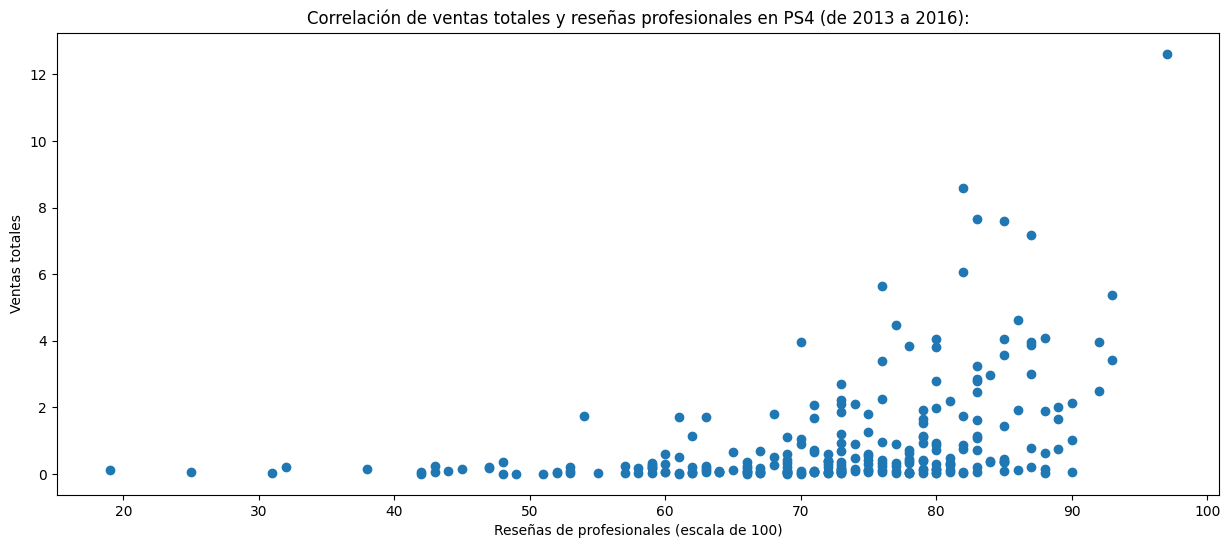

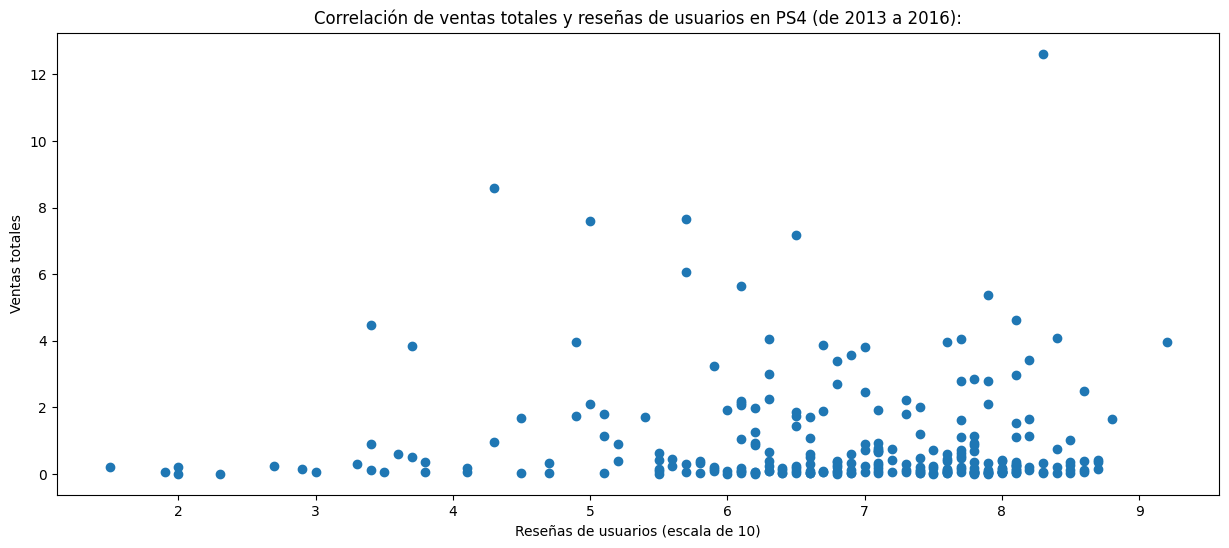

In [29]:
# Scatter plot for critic_score
plt.figure(figsize=(15, 6))
plt.scatter(games_ps4['critic_score'], games_ps4['total_sales'])
plt.title('Correlación de ventas totales y reseñas profesionales en PS4 (de 2013 a 2016):')
plt.xlabel('Reseñas de profesionales (escala de 100)')
plt.ylabel('Ventas totales')
plt.show()

# Scatter plot for user_score
plt.figure(figsize=(15, 6))
plt.scatter(games_ps4['user_score'], games_ps4['total_sales'])
plt.title('Correlación de ventas totales y reseñas de usuarios en PS4 (de 2013 a 2016):')
plt.xlabel('Reseñas de usuarios (escala de 10)')
plt.ylabel('Ventas totales')
plt.show()

In [30]:
# Correlation between the total sales and reviews
ps4_sales_critic_score = games_ps4['total_sales'].corr(games_ps4['critic_score'])
ps4_sales_user_score = games_ps4['total_sales'].corr(games_ps4['user_score'])

# Print data
print(f'Correlación entre las ventas totales y las reseñas de profesionales en la plataforma PS4: {ps4_sales_critic_score:.2f}')
print()
print(f'Correlación entre las ventas totales y las reseñas de usuarios en la plataforma PS4: {ps4_sales_user_score:.2f}')

Correlación entre las ventas totales y las reseñas de profesionales en la plataforma PS4: 0.41

Correlación entre las ventas totales y las reseñas de usuarios en la plataforma PS4: -0.03


<div style="color: #196CC4;">
<b>ANÁLISIS DE RESULTADOS: </b><br>
▶ Al observar el promedio de las calificaciones de profesionales y usuarios con su respectiva escala, es notoria la similitud entre ambos, siendo el score de los profesionales de 72/100, mientras que el score de usuarios es de 6.7/10. Esto mismo se observa también en las gráficas de dispersión.<br>
▶ Por otro lado, hay una correlación normal entre las reseñas de los profesionales y las ventas (coeficiente de 0.41). Esto indica que, cuanto más alto sea el puntaje de las reseñas profesionales, es más probable que las ventas sean más altas, y viceversa. <br>
▶ De manera contrastante, la correlación entre las reseñas de los usuarios y las ventas es más baja (coeficiente de -0.03). Esto sugiere que las reseñas de los usuarios tienen una influencia más débil en las ventas del PS4 en comparación con las reseñas profesionales. </div>

### Distribución por género

<div style="color: #196CC4;">
▶ A continuación se muestra la distribución general y rentabilidad de los juegos por género.</div>

In [31]:
# Total platforms
total_genres = games['genre'].nunique()
print("Cantidad total de géneros a lo largo de las décadas:")
print(total_genres)
print()

# Platforms ranking with top sales from 1980 to 2016
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Platforms ranking with top sales from 2013 to 2016
new_genre_sales = new_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

Cantidad total de géneros a lo largo de las décadas:
12



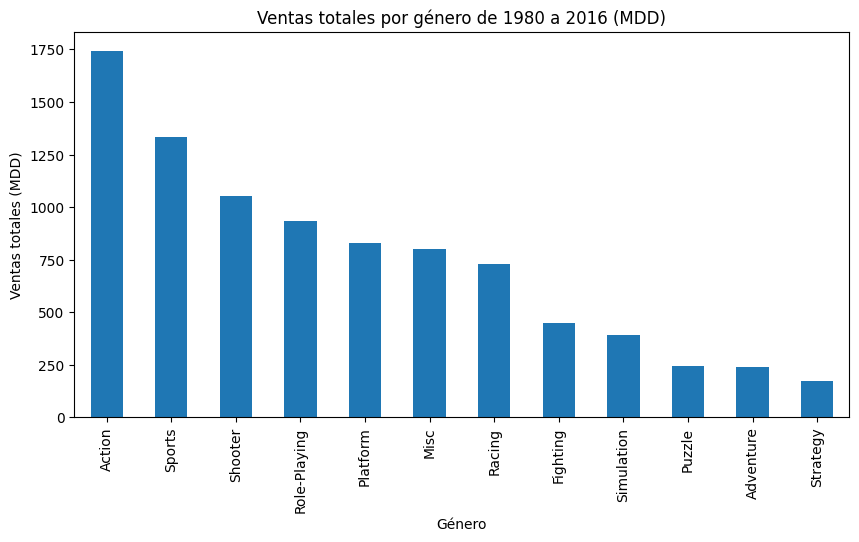

In [32]:
# Bar graph creation
genre_sales.plot(
        x='genre',
        kind='bar',
        stacked=True,
        title='Ventas totales por género de 1980 a 2016 (MDD)',
        xlabel='Género',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 5])

plt.show() 

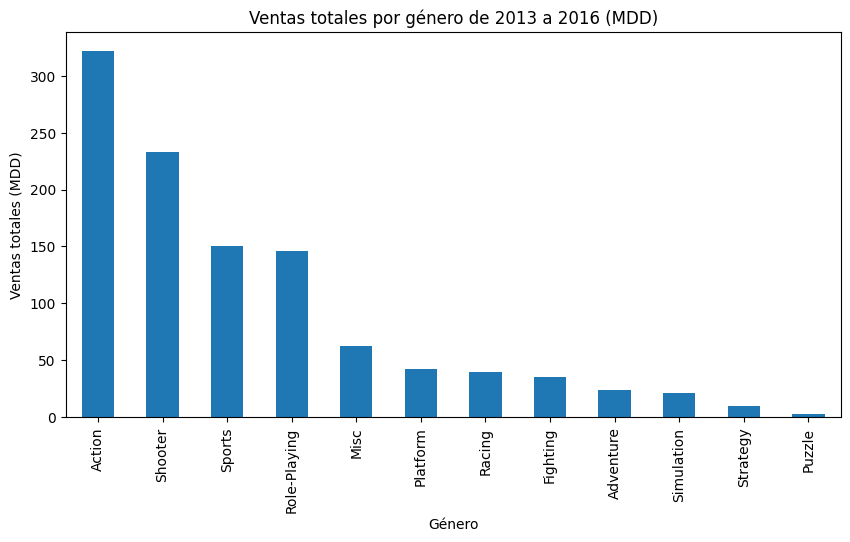

In [33]:
# Bar graph creation
new_genre_sales.plot(
        x='genre',
        kind='bar',
        stacked=True,
        title='Ventas totales por género de 2013 a 2016 (MDD)',
        xlabel='Género',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 5])

plt.show() 

<div style="color: #196CC4;">
<b>ANÁLISIS DE RESULTADOS (de 2013 a 2016): </b><br>
▶ Se observa que los géneros de videojuegos que generan las ventas más altas son Action, Shooter y Sports. <br>
▶ El género más rentable es Action, que tiene una gran ventaja sobre los otros géneros, demostrando que son particularmente populares para los usuarios.<br>
▶ También hay géneros que generan ventas más bajas como Simulación, Estrategia y Puzzle que están en la parte inferior de la lista; estos géneros podrían no tener la misma demanda generalizada que otros.<br> 
</div>

-----

## Perfil de usuario para cada región

### Plataformas principales

<div style="color: #196CC4;">
▶ A continuación se muestran las plataformas con las cuotas de mercado más altas para las diferentes zonas geográficas: Norteamérica, Europa y Japón.
</div>

In [34]:
# Platforms ranking with top sales per zone
na_platform_sales = new_games.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)
#na_platform_sales = new_games[new_games['year_of_release'].groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)
na_platform_sales = na_platform_sales.head(5)

eu_platform_sales = new_games.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False)
#eu_platform_sales = new_games[new_games['year_of_release'].groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False)
eu_platform_sales = eu_platform_sales.head(5)

jp_platform_sales = new_games.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False)
#jp_platform_sales = new_games[new_games['year_of_release'].groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False)
jp_platform_sales = jp_platform_sales.head(5)

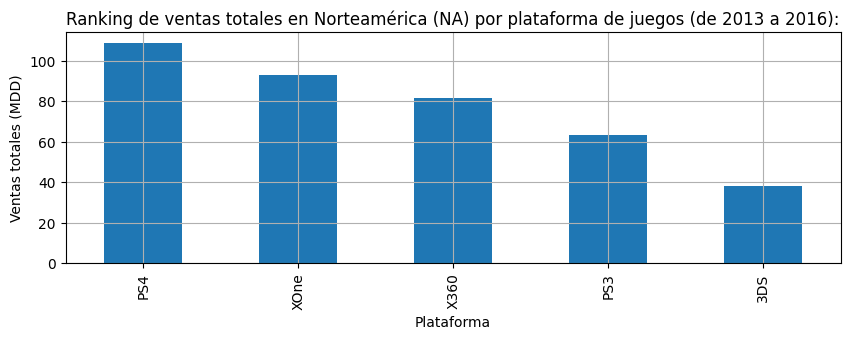

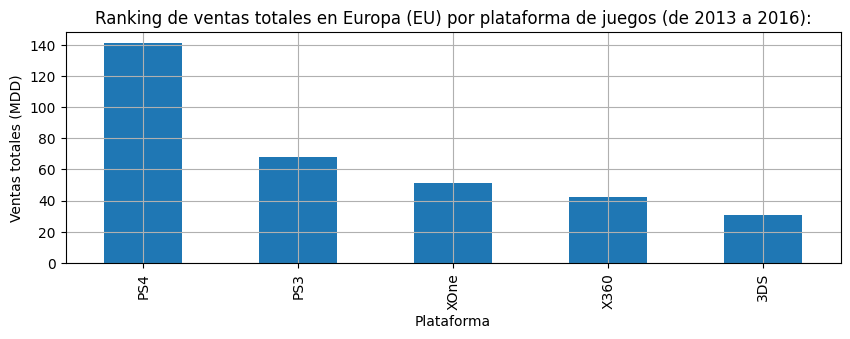

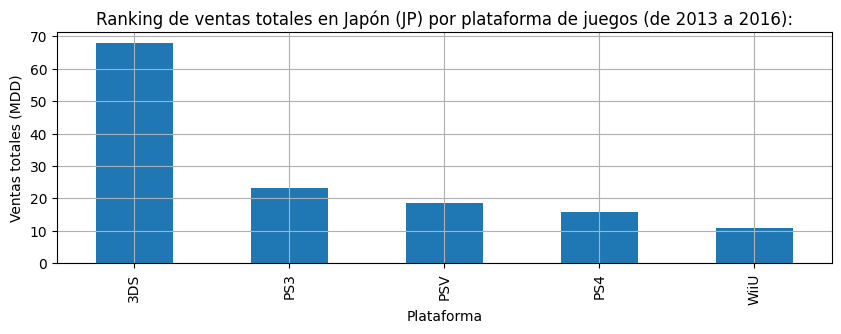

In [35]:
# NA - Bar graph creation
na_platform_sales.plot(
        kind='bar',
        grid=True,
        x='platform',
        title='Ranking de ventas totales en Norteamérica (NA) por plataforma de juegos (de 2013 a 2016):',
        xlabel='Plataforma',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.show() 

# EU - Bar graph creation
eu_platform_sales.plot(
        kind='bar',
        grid=True,
        x='platform',
        title='Ranking de ventas totales en Europa (EU) por plataforma de juegos (de 2013 a 2016):',
        xlabel='Plataforma',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.show() 

# JP - Bar graph creation
jp_platform_sales.plot(
        kind='bar',
        grid=True,
        x='platform',
        title='Ranking de ventas totales en Japón (JP) por plataforma de juegos (de 2013 a 2016):',
        xlabel='Plataforma',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.show() 

<div style="color: #196CC4;">
<b>ANÁLISIS</b><br>
Con base en las gráficas anteriores se observan particularidades en la preferencia de plataformas por parte de los usuarios de una zona geográfica a otra dentro del rango de años de 2013 a 2016:<br><br>
▶ Las 3 plataformas predominantes para cada zona son PS4 (Norteamérica y Europa) y 3DS (Japón) respectivamente.
<ul>
    <li>Norteamérica: PS4 es la plataforma más popular, seguida por XOne y X360.</li>
    <li>Europa: PS4 lidera, seguida por PS3 y XOne.</li>
    <li>Japón: La plataforma más utilizada es 3DS, seguida por PS3 y PSV.</li>
</ul>
▶ En Norteamérica y Europa hay coincidencia en todas las plataformas aunque no en el mismo orden.<br>
▶ Japón tiene preferencia por PSV y WiiU, plataformas que no se encuentra en el ranking de las otras dos zonas.
</div>

### Géneros principales

<div style="color: #196CC4;">
▶ A continuación se muestran los géneros con las cuotas de mercado más altas para las diferentes zonas geográficas: Norteamérica, Europa y Japón.
</div>

In [36]:
# Genres ranking with top sales per zone

na_genre_sales = new_games.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False)
#na_genre_sales = games[games['year_of_release'].isin(new_games)].groupby(['genre'])['na_sales'].sum().sort_values(ascending=False)
na_genre_sales = na_genre_sales.head(5)

eu_genre_sales = new_games.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False)
#eu_genre_sales = games[games['year_of_release'].isin(new_games)].groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False)
eu_genre_sales = eu_genre_sales.head(5)

jp_genre_sales = new_games.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False)
#jp_genre_sales = games[games['year_of_release'].isin(new_games)].groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False)
jp_genre_sales = jp_genre_sales.head(5)

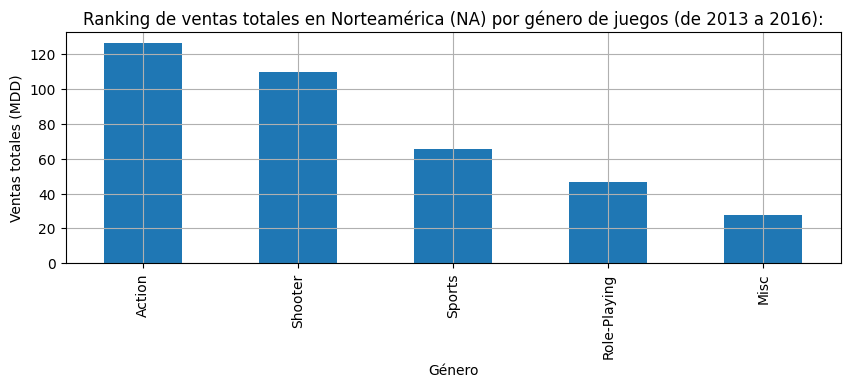

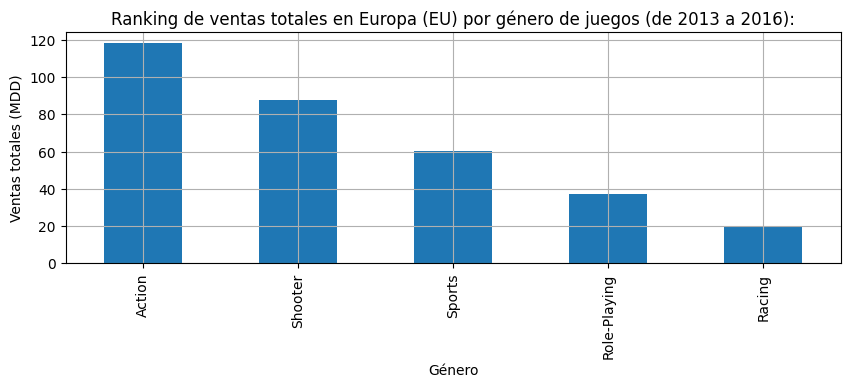

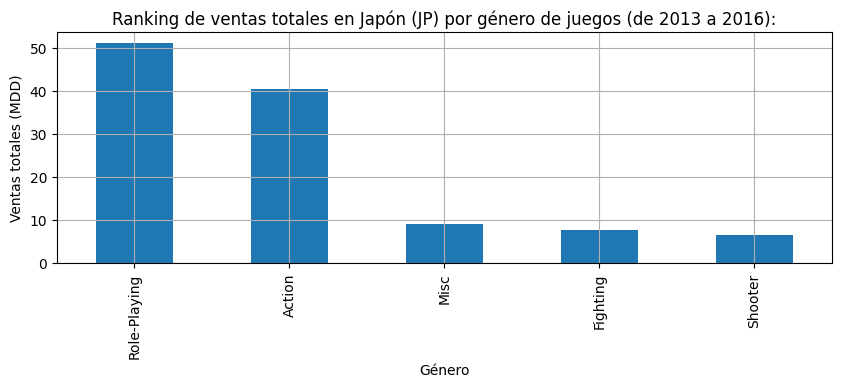

In [37]:
# NA - Bar graph creation
na_genre_sales.plot(
        kind='bar',
        grid=True,
        x='genre',
        title='Ranking de ventas totales en Norteamérica (NA) por género de juegos (de 2013 a 2016):',
        xlabel='Género',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.show() 

# EU - Bar graph creation
eu_genre_sales.plot(
        kind='bar',
        grid=True,
        x='genre',
        title='Ranking de ventas totales en Europa (EU) por género de juegos (de 2013 a 2016):',
        xlabel='Género',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.show() 

# JP - Bar graph creation
jp_genre_sales.plot(
        kind='bar',
        grid=True,
        x='genre',
        title='Ranking de ventas totales en Japón (JP) por género de juegos (de 2013 a 2016):',
        xlabel='Género',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.show() 

<div style="color: #196CC4;">
<b>ANÁLISIS</b><br>
Con base en las gráficas anteriores se observan particularidades en la preferencia de género de videojuegos por parte de los usuarios de una zona geográfica a otra dentro del rango de años de 2013 a 2016.<br><br>
▶ Los 3 géneros predominantes para cada zona son 'Action' (Norteamérica y Europa) y 'Role-Playing' (Japón) respectivamente.
<ul>
    <li>Norteamérica: Action es el género más popular, seguido por Shooters y Sports.</li>
    <li>Europa: Action es el género más popular, seguido por Shooters y Sports.</li>
    <li>Japón: El género preferido es Role-Playing, seguido por Action y Misc.</li>
</ul>
▶ Hay géneros predominantes que coinciden en todas las zonas: 'action', 'Shooter' y 'Role-Playing'.<br>
▶ Japón tiene una particular preferencia por los géneros 'Fighting' y 'Misc'.<br>
</div>

### Clasificaciones ESRB

<div style="color: #196CC4;">
▶ A continuación se muestran las clasificaciones ESRB (Entertainment Software Rating Board) con las cuotas de mercado más altas para las diferentes zonas geográficas: Norteamérica, Europa y Japón.<br>
▶ Esta clasificación es el organismo de clasificación de videojuegos en América del Norte. Este sistema proporciona información sobre la edad apropiada para jugar juegos específicos en función de su contenido. 
    <ul>
        <li>Everyone (E) - Para todos</li>
        <li>Everyone 10+ (E10+) - Mayores de 10 años</li>
        <li>Teen (T) - Adolescentes</li>
        <li>Mature (M) - Adultos</li>
        <li>Adults Only (AO) - Solo adultos</li>
    </ul>
</div>

In [38]:
# Rating ranking with top sales per zone

na_rating_sales = new_games.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
#na_rating_sales = games[games['year_of_release'].isin(new_games)].groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
na_rating_sales = na_rating_sales.head(5)

eu_rating_sales = new_games.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
#eu_rating_sales = games[games['year_of_release'].isin(new_games)].groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
eu_rating_sales = eu_rating_sales.head(5)

jp_rating_sales = new_games.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
#jp_rating_sales = games[games['year_of_release'].isin(new_games)].groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
jp_rating_sales = jp_rating_sales.head(5)

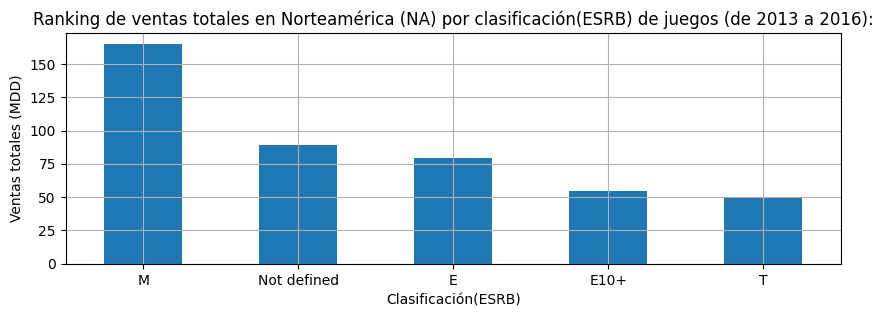

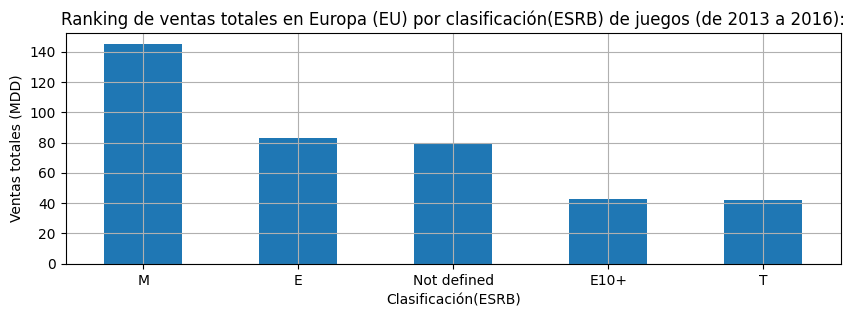

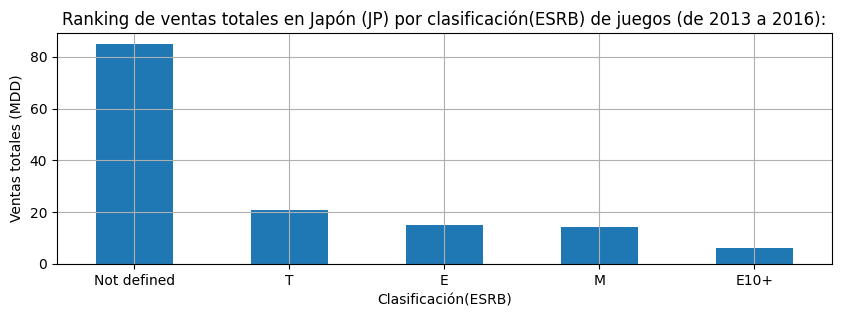

In [39]:
# NA - Bar graph creation
na_rating_sales.plot(
        kind='bar',
        grid=True,
        x='rating',
        title='Ranking de ventas totales en Norteamérica (NA) por clasificación(ESRB) de juegos (de 2013 a 2016):',
        xlabel='Clasificación(ESRB)',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.xticks(rotation=360)
plt.show() 

print()

# EU - Bar graph creation
eu_rating_sales.plot(
        kind='bar',
        grid=True,
        x='rating',
        title='Ranking de ventas totales en Europa (EU) por clasificación(ESRB) de juegos (de 2013 a 2016):',
        xlabel='Clasificación(ESRB)',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.xticks(rotation=360)
plt.show() 

print()

# JP - Bar graph creation
jp_rating_sales.plot(
        kind='bar',
        grid=True,
        x='rating',
        title='Ranking de ventas totales en Japón (JP) por clasificación(ESRB) de juegos (de 2013 a 2016):',
        xlabel='Clasificación(ESRB)',
        ylabel='Ventas totales (MDD)',
        figsize=[10, 3])
plt.xticks(rotation=360)
plt.show() 

<div style="color: #196CC4;">
<b>ANÁLISIS</b><br>
Con base en las gráficas anteriores se observan particularidades en la preferencia clasificación de juegos por parte de los usuarios de una zona geográfica a otra en el rango de años de 2013 a 2016.<br><br>
▶ Las 3 clasificaciones predominantes para cada zona son 'Mature (M) - Adultos' (Norteamérica y Europa) y 'Not defined' (Japón) respectivamente. <em>(*Al parecer hay una gran cantidad de videojuegos que no tienen clasificación).</em>
<ul>
    <li>Norteamérica: Mature (M) - Adultos, Not defined y Everyone (E) - Para todos. </li>
    <li>Europa: Mature (M) - Adultos, Everyone (E) - Para todos y Not defined.</li>
    <li>Japón: Not defined, Teen (T) - Adolescentes y Everyone (E) - Para todos. </li>
</ul>
▶ Nuevamente Japón tiene una particularidad con las clasificaciones; su lista está encabezada por aquellos juegos que no tienen clasificación y hay una gran diferencia en ventas con relación al resto de las clasificaciones en este país.
</div>

-----

## Prueba de hipótesis

### Calificaciones por plataforma

<p style="color:#196CC4">
    <b>PLANTEAMIENTO</b><br>
    <b>Hipótesis de negocio inicial:</b> "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas".<br><br>
    Partiendo de esta hipótesis inicial se realizará el análisis con la siguiente información (por consistencia la hipótesis nula tiene su base en la igualdad).<br>
    <b>▶ Hipótesis nula (coincide con hipótesis de negocio):</b> "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas".<br> 
    <b>▶ Hipótesis alternativa:</b> "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes".<br><br>
</p>

<p style="color:#196CC4">
    <b>PRUEBA T: </b><br>
    La selección de la prueba t de dos muestras es adecuada porque queremos comparar las calificaciones de usuarios promedio de dos grupos independientes de plataformas de juegos: Xbox One y PC. <br><br></p>

In [40]:
# Remove NaN
#games['user_score'].fillna(0, inplace=True)
games['user_score'].dropna(inplace=True)

# Sample definition
user_score_xbox = new_games[new_games['platform'] == 'XOne']['user_score']
user_score_pc = new_games[new_games['platform'] == 'PC']['user_score']
#user_score_xbox = games[(games['platform'] == 'XOne') & (games['year_of_release'].isin(new_games))]['user_score']
#user_score_pc = games[(games['platform'] == 'PC') & (games['year_of_release'].isin(new_games))]['user_score']

# Remove NaN
user_score_xbox = user_score_xbox.dropna()
user_score_pc = user_score_pc.dropna()

# test t
t_stat, p_value = stats.ttest_ind(user_score_xbox, user_score_pc, equal_var=False)

# Display data
print("Valor alpha: 0.05")
print("Valor t:", t_stat)
print("Valor p:", p_value)

# Hypothesis evaluation
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa entre las calificaciones promedio de usuarios para Xbox One y PC.")
else:
    print("No se puede rechazar la hipótesis nula: No hay suficiente evidencia para concluir que hay una diferencia significativa entre las calificaciones promedio de usuarios para Xbox One y PC.")

Valor alpha: 0.05
Valor t: 1.45192815744488
Valor p: 0.14759594013430463
No se puede rechazar la hipótesis nula: No hay suficiente evidencia para concluir que hay una diferencia significativa entre las calificaciones promedio de usuarios para Xbox One y PC.


<p style="color:#196CC4">
   <b>VALOR ALPHA:</b><br>
    El valor más comúnmente utilizado es 0.05, que representa una probabilidad de 5% de cometer un error.<br><br> 
    <b>ANÁLISIS DE RESULTADOS (rango de años 2013 a 2016): </b><br>
    El valor de p es 0.147..., que es mayor al valor alpha, indica que no podemos rechazar la hipótesis nula (también hipótesis inicial de negocio); esto es porque "no hay una diferencia significativa entre las calificaciones de usuarios para Xbox One y PC".
    </p>

### Calificaciones por género

<p style="color:#196CC4">
    <b>PLANTEAMIENTO</b><br>
    <b>Hipótesis de negocio inicial:</b>"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes".<br><br>
    Partiendo de esta hipótesis inicial se realizará el análisis con la siguiente información (por consistencia la hipótesis nula tiene su base en la igualdad).<br>
    <b>▶ Hipótesis nula:</b> "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales".<br> 
    <b>▶ Hipótesis alternativa (coincide con hipótesis de negocio):</b> "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes".<br><br>
</p>

<p style="color:#196CC4">
    <b>PRUEBA T: </b><br>
    La selección de la prueba t de dos muestras es adecuada porque queremos comparar las calificaciones de usuarios promedio de dos grupos independientes de géneros de juegos: "Action" y "Sports". <br><br></p>

In [41]:
# Sample definition
#user_score_action = games[(games['genre'] == 'Action') & (games['year_of_release'].isin(new_games))]['user_score']
#user_score_sports = games[(games['genre'] == 'Sports') & (games['year_of_release'].isin(new_games))]['user_score']
user_score_action = new_games[new_games['genre'] == 'Action']['user_score']
user_score_sports = new_games[new_games['genre'] == 'Sports']['user_score']

# Remove NaN
user_score_action = user_score_action.dropna()
user_score_sports = user_score_sports.dropna()

# test t
t_stat, p_value = stats.ttest_ind(user_score_action, user_score_sports, equal_var=False)

# Display data
print("Valor alpha: 0.05")
print("Valor t:", t_stat)
print("Valor p:", p_value)

# Hypothesis evaluation
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: No hay suficiente evidencia para concluir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")

Valor alpha: 0.05
Valor t: 10.233428417448625
Valor p: 1.4460039700704318e-20
Se rechaza la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


<p style="color:#196CC4">
   <b>VALOR ALPHA:</b><br>
    El valor más comúnmente utilizado es 0.05, que representa una probabilidad de 5% de cometer un error.<br><br> 
    <b>ANÁLISIS DE RESULTADOS (rango de años 2013 a 2016): </b><br>
    El valor de p es 1.446..., mayor que el valor alpha. Con esto estamos validando que "las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes", inclinándonos positivamente por la hipótesis alternativa y de negocio inicial.
    </p>

-----

## Conclusiones

<div style="color:#196CC4">
<ul>
<li><b>Lanzamiento de videojuegos por año</b><br>
A lo largo de las décadas se observa cómo ha evolucionado la cantidad de lanzamientos de videojuegos y sería interesante complementar este análisis también con el surgimiento de otras tecnologías y cómo estos videojuegos en plataformas gradualmente van evolucionando a otros dispositivos con mayor predominancia en la actualidad.</li>
<li><b>Tendencia de plataformas</b><br>
Ha sido interesante observar el ciclo de vida que tienen las plataformas de videojuegos a lo largo de los años y cómo la industria pasó del lanzamiento de una sola plataforma a la competencia de varias innovaciones simultáneamente. Hay que tomar en cuenta que este patrón de comportamiento en el ciclo de vida las plataformas podría no siempre ser así, más adelante nuevos dispositivos, tecnologías o el surgimiento masivo de una gran variedad de posibilidades en el mundo de los videojuegos puede dar paso a nuevos patrones de comportamiento.</li>
<li><b>Ventas por género de videojuegos</b><br>
Los juegos de acción, deportes y disparos son los más populares y rentables, mientras que los juegos de estrategia, rompecabezas y simulaciones pueden no ser tan dominantes en términos de ventas.</li>
<li><b>Correlación de reseñas y ventas de videojuegos</b><br>
Las reseñas de los profesionales a menudo tienen más peso en la decisión de compra de los consumidores.</li>
<li><b>Plataformas de videojuegos por zona</b><br>
La preferencia de plataformas varía significativamente entre regiones, y mientras algunas plataformas son universales, otras son más específicas de ciertas zonas. Esta información es crucial para comprender el mercado y dirigir estrategias de lanzamiento y marketing de juegos.</li>
<li><b>Géneros de videojuegos por zona</b><br>
Resumiendo las preferencias por género de videojuegos, mientras que 'Acción', 'Shooter' y 'Deportes' son consistentemente populares en Norteamérica y Europa, Role-Playing' tiene un dominio claro en Japón. </li>
<li><b>Clasificación de videojuegos por zona</b><br>
En cuanto a las clasificaciones, mientras que 'Everyone (E) - Para todos' y 'Mature (M) - Adultos' son consistentemente populares en Norteamérica y Europa, la clasificación 'Not defined' tiene un dominio claro en Japón. Sería interesante también conocer un poco más acerca de los criterios considerados para la clasificación de videojuegos y porqué hay una gran cantidad de ellos sin etiquetar.</li>
</ul>
</div>